# ASTRO 30400 - Galaxies

## Problem Set 5

### Exploring processes affecting galaxy formation and building a galaxy formation model

### Student : Dimitrios Tanoglidis

### Comments

#### score = 20/35

-15 points for submission 3 days late. 

1b) - z_min = 0.0001; z_max = 0.5
Dmax = 1000.

given the large z_max you use, you should filter out galaxies by angular size so that
you don't use galaxies strongly affected by seeing effects (half-light radii of <~0.75 arcsec).
Otherwise, such galaxies wash out and change the r50-M* relation. 

- Not clear why you are using Petrosian r50 instead of much better measured half-mass radius from the Meert photometry.
(variable name r_tot). In the case of this comparison, this does affect your result, because Petrosian r50 for large massive
galaxies significantly underestimates r50 and so the difference with the model looks larger than it should be at large masses. 
Compare to the same comparison in hw05_solutions, but where I use r_tot from Meert et al. 2015 photometry, instead of the SDSS
petroR50.  


    halfradius = d_Am*arcsec*phot_r['petroR50']*1000.0
    
Also note that smallest galaxies for M*<1e9 Msun you are plotting - their sizes are affected by limited seeing in the SDSS imaging data. 
So sizes of the smallest galaxies are not correct. This can be handled by selecting only galaxies with apparent sizes larger than
seeing. 

- when you have too many points, so they overlap, either reduce the size of the plotted points, or plot them as 2d histogram.

- $M_\star$ scales as $h^{-2}$, not as $h^{-1}$

    ax.set_xlabel(r'$M_*\,\, [h^{-1} M_\odot]$')
    
- "We see that in practice galaxies scatter in $r_{50} - M_*$ plane; 
there is not an exact "one-to-one" correspondence between stellar mass and half-mass radius."

Model also predicts scatter - we just don't explore it here. Size in the model is proportional
to the spin, $\lambda$. The spin is predicted to have log-normal distribution with $\sigma_{\ln\lambda)\approx 0.55$.

2b) "The egreement isn't so good for lower mass scales."

results for Muratov et al. 2015 model are not quite correct: 
    def eps_out(self):
        mass = self.Ms
        epsout = 3.6*(mass/1e10)**(-0.35)
        return epsout
        
    this maybe because for small mass halos during early stages evolution this
    function is called while self.Ms=0? check for self.Ms>0, while otherwise set epsout to 0. 
    


### Problem 1  - Size model in the galaxy formation model and comparison with observations

As discussed in S 2.4.4 of the notes, in the classic models of disk galaxy formation disk sizes are set by the specific angular momentum of gas, so that $r_{1/2}\propto \lambda R_{200}$, where $\lambda$ is dimensionless spin parameter characterizing specific angular momentum (Fall & Efstathiou 1980; Mo, Mao & White 1998 - hereafter MMW), which is defined as $\lambda=j/(V_{200}R_{200})$, where $j$ is specific angular momentum (AM per unit mass) of baryons when they accrete onto halo, $V_{200}=\sqrt{GM_{200}/R_{200}}$ is halo circular velocity at $R_{200}$, and $R_{200}$ is the radius enclosing density contrast equal $200\rho_{\rm crit}(z)$, where $\rho_{\rm crit}(z)=3H^2(z)/(8\pi G)$ is the critical density at redshift $z$: $$R_{200}=[3M_{200}/(4\pi G 200\rho_{\rm cr})]^{1/3}=162.63h^{-1}\, {\rm kpc}(M_{200}/10^{12}h^{-1}\ M_{\odot})^{1/3} E(z)^{-1}.$$ It can be computed from the halo mass using the colossus function halo.mass_so.M_to_R as shown in code example below.

(a) Implement the model for $r_{50}$ from Mo, Mao and White (1998) given by equation 2.50 in the notes: $$r_{50}=1.678R_d=1.187(j_d/m_d)f_c^{-1/2}f_R\lambda R_{200},$$ a routine with the model for galaxy size in the galaxy model you started exploring in HW 4.
Here $r_{50}$ is galaxy half mass radius, $R_d$ is disk exponential scale length, $R_{200}$ is the radius enclosing density contrast of 200 relative to the critical density at the redshift of interest, $c=c_{200}$ is concentration of halo profile (see below for how to compute it with colossus), $j_d$ and $m_d$ are fractions of baryon angular momentum and mass budget within halo in the central disk, $f_c$ is a function of halo concentration (see eq. 23 in MMW98 and below for the exact expression), and $f_R\approx 1$ is a function that can be used to take into account baryonic contraction of halo in response to halo formation (see S 2.3 of MMW98). Assuming $j_d/m_d=1$, $f_R=1$, and compute $f_c$ factor using concentration model within colossus a
Essentially, for each epoch the model knows mass of the halo that is hosting the model galaxy (self.Mh). Use the host mass and colossus M_to_R conversion routine as above to get radius. Assume constant spin parameter of $\lambda=0.045$ (this is the median of the log-normal distribution of halo spins), $j_d/m_d=1$, $f_R=1$, and compute $f_c$ factor using concentration model within colossus, as shown in the example below.
Test the routine by plotting $r_{50}$ vs $R_{200}$ at a few redshifts.

(b) Run the model for a series of halo masses as was done previously and construct ${r50}-M_\star$ relation predicted. Use the Meert et al. (2015) SDSS data set we've been using before to plot the distribution of galaxies in the $r_{50}-M_\star$ plane and construct the median $r_{50}$ at a given $M_\star$ and plot it as a function of $M_\star$. Compare the prediction of the model to the relation exhibited by the data. Comment on the similarities or discrepancies that you notice.



### Solution

##### a)


For a few values of z ($z = 0,1,2,3,6$) we implement the above model for a range of halo masses: $[10^{9} - 10^{15}] \,\, h^{-1} M_\odot$. Using the colossus routines we calculate $M_{200}, R_{200}\,\, \mbox{and} \,\,c_{200}$ and then $r_{50}$ using the above formula and the approximations $f_R =1,\,\, j_d/m_d = 1\,$, $\lambda = 0.045$.


We plot the results below. 




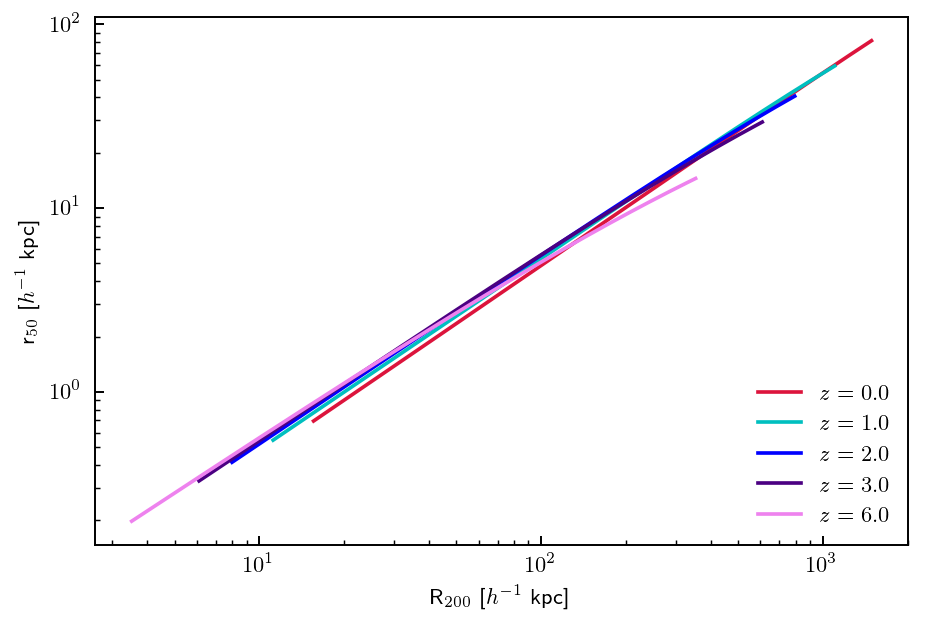

In [1]:
# setup notebook for inline figures
%matplotlib inline
import numpy as np

# import pyplot and set some parameters to make plots prettier
import matplotlib.pyplot as plt
from code.plot_utils import plot_pretty
plot_pretty()

from colossus.halo.concentration import concentration
from colossus.cosmology import cosmology
from colossus.halo.mass_so import M_to_R
from colossus.halo.mass_defs import changeMassDefinition

# define a vector of cosmological parameters:    
my_cosmo = {'flat': True, 'H0': 70.0, 'Om0': 0.27, 'Ob0': 0.045714, 'sigma8': 0.82, 'ns': 0.96}
# set my_cosmo to be the current cosmology
cosmo = cosmology.setCosmology('my_cosmo', my_cosmo)



# I  create a function that gets virial masses -an array- and redshift and returns two arrays: one containing r50 
# and one containing r200 . Both radii are in kpc /h 



def tworadii(Mvir, z):
    cvir = concentration(Mvir, 'vir', z, model='diemer15')
    M200, R200, c200 = changeMassDefinition(Mvir, cvir, z, 'vir', '200c')
    #Calculation of fc, equation 23 in Mo, Mao, White
    c = c200
    fc = 0.5*c*(1.-1./(1.+c)**2-2.*np.log(1.+c)/(1.+c))/(c/(1.+c)-np.log(1.+c))**2
    jmlam = 0.045 # (j_d/m_d)*lambda
    # f_R = 1
    fR = 1.0
    #Calculation of the numerical parameter in front of R200
    eta = 1.187/np.sqrt(fc)*jmlam*fR
    # M_to_R takes mass in /h Msun and outputs R in /h kpc
    Radius = M_to_R(M200, z, '200c')
    r50 = eta*Radius
    return R200, r50


#Range of halo - virial - masses in 1/h M_sun
lmh = np.arange(9.0, 15.0, 0.01)
mh = np.power(10.0, lmh)

#Now, find for that range of masses R200, r50 at different redshifts 

R200z00 = tworadii(mh, 0.0)[0]; r50z00 = tworadii(mh, 0.0)[1]
R200z10 = tworadii(mh, 1.0)[0]; r50z10 = tworadii(mh, 1.0)[1]
R200z20 = tworadii(mh, 2.0)[0]; r50z20 = tworadii(mh, 2.0)[1]
R200z30 = tworadii(mh, 3.0)[0]; r50z30 = tworadii(mh, 3.0)[1]
R200z60 = tworadii(mh, 6.0)[0]; r50z60 = tworadii(mh, 6.0)[1]




plt.plot(R200z00, r50z00, c ='crimson', label=r'$z=0.0$')
plt.plot(R200z10, r50z10, c ='c', label=r'$z=1.0$')
plt.plot(R200z20, r50z20, c ='b', label=r'$z=2.0$')
plt.plot(R200z30, r50z30, c ='indigo', label=r'$z=3.0$')
plt.plot(R200z60, r50z60, c ='violet', label=r'$z=6.0$')





plt.legend(frameon=False, loc='lower right', fontsize=9)
plt.xscale('log'); plt.yscale('log')

plt.xlabel('R$_{200}$   [$h^{-1}$ kpc]')
plt.ylabel('r$_{50}$   [$h^{-1}$ kpc]')

plt.show()





##### b) 


For the first part of this question we have to construct the predicted $r_{50} - M_\star$ relation. In order to do so, since the input is the halo mass, $M_h$, we will need to use a $M_h - M_*$ relation. We will use the relation for $z=0$ contained in the data/ms_mvir_z0.dat file. Then we will compare this relation to observations. We then have to use nearby (low $z$) galaxies from the SDSS catalogue in order to have a vair comparison.

Actually, since we have $r_{50}$ for the range of halo masses used above ($10^9 - 10^{15}  \,\, h^{-1} M_\odot$), the only thing we need is to convert this range of halo masses to stellar masses. 

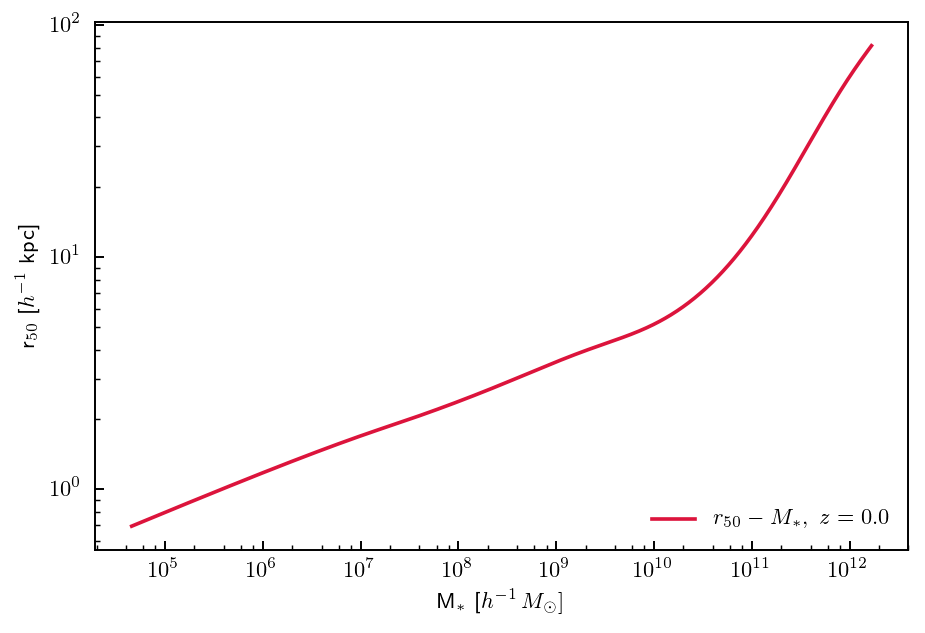

In [2]:
# We will need to interpolate, so let's import the interpolation function from scipy

from scipy.interpolate import UnivariateSpline

# load the z=0 M*-Mvir relation derived from AM above
#MvirAM and MsAM are both in Msun (no h), and were computed for h=0.7
MvirAM, MsAM = np.loadtxt('ms_mvir_z0.dat', usecols=(0,1), unpack=True)

#We have then MvirAm, MsAM in solar masses. Since we have used mases in Msun /h , let's also convert these
# We have to MULTIPLY by h in order to have values in units of M/h

h = 0.7

MvirAM = MvirAM*h
MsAM = MsAM*h

#Since we have halo masses and we want to get the corresponding values of stellar masses  we will use interpolation
#to get a function that gets as x value the halo mass and gives stellar mass

Mstelspline = UnivariateSpline(MvirAM, MsAM, s=0.0)

#Create array containing 

mstell = Mstelspline(mh)

plt.plot(mstell, r50z00, c ='crimson', label=r'$r_{50} - M_*, \,\,z=0.0$')

plt.legend(frameon=False, loc='lower right', fontsize=9)
plt.xscale('log'); plt.yscale('log')

plt.xlabel('M$_{*}$   [$h^{-1} \, M_\odot]')
plt.ylabel('r$_{50}$   [$h^{-1}$ kpc]')

plt.show()



Now, we will create a similar plot using the data from the Meert et al. (2015) SDSS data set.

In order to do so, I will make some assumptions.

First of all, I will assume that the the half-light radius is $\sim$ the half-mass radius. 

Second, in order to convert luminosities to stellar masses, I'll use the relation from HW02:

\begin{equation}
\log_{10}\left(\frac{M_*}{L_r} \right) = - 0.306 + 1.097(g - r) - 0.1
\end{equation}

Also, the half-light radius is given in arcsecs. We need to convert that to a physical size (kpc). In order to do so, we will use the angular diameter distance, which can be calculated using colossus, and the relation:

\begin{equation}
d_A \cong \frac{R}{\theta} \Rightarrow R = \theta \, d_A
\end{equation}

where $R$ the physical size and $\theta$ the angular size of an object at distance $d_A$.

In [3]:
import numpy as np
# now read the Upenn catalog and apply selection cuts to galaxies 
from colossus.cosmology import cosmology

# set cosmology to the best values from 9-year WMAP data
cosmo = cosmology.setCosmology('WMAP9')

# to save space the routine to read the catalog is now in code/read_data
from code.read_data import read_meert_catalog
# input phot_type selects photometry model fit:  1=best fit, 2=deVaucouleurs, 3=Sersic, 4=DeVExp, 5=SerExp
sdata, mdata, mnpdata, phot_r, mdatag, mnpdatag, morph = read_meert_catalog(phot_type=3)

# define some limiting parameters for the sample and make the corresponding cuts
z_min = 0.0001; z_max = 0.5
Dmax = 1000.
m_min = 14.5; m_max = 17.77

# prepare preliminary quantities
size = phot_r['petroR50']; extm = mnpdata['extinction']
# correct the Petrosian magnitude for extinction
mrm = phot_r['petroMag'] - extm
# compute surface brightnesses
sb50 = mrm - 2.5*np.log10(0.5) + 2.5*np.log10(np.pi*(size)**2) #+ 10.*np.log10(1.+data['z'])
# and extinction corrected colors
grm = mdatag['m_tot'] - mdata['m_tot'] - mnpdatag['extinction'] + mnpdata['extinction']
# pre-computed Vmax volume available in the catalog
vmaxm = mnpdata['Vmax'];
zm = sdata['z'];
# compute luminosity and angular diameter distances in Mpc/h
d_Lm = cosmo.luminosityDistance(zm)
d_Am = d_Lm/(1.+zm)**2.0

# make some cuts to eliminate bad regimes or catastrophic failures
ilim = (vmaxm>0) & (mrm > m_min) & (mrm < m_max) & (sdata['z'] > z_min) & (sdata['z'] < z_max) & (d_Am < Dmax) & (sb50 > 0.) & (sb50 <= 25.) & (grm>-0.5) & (grm<2.2)

# select data within these cuts
sdata = sdata[ilim]; mdata = mdata[ilim]; phot_r = phot_r[ilim] 
mnpdata = mnpdata[ilim]; grm = grm[ilim]; morph = morph[ilim]
mdatag = mdatag[ilim]; mnpdatag = mnpdatag[ilim]
zm = sdata['z']; mpetrom = phot_r['petroMag']; mmeert = mdata['m_tot']
sb50 = sb50[ilim]; extm = mnpdata['extinction']; kcorr = mnpdata['kcorr']
 

print "selected", np.size(zm), " after all cuts..."

# inverse Vmax. In this catalog pre-computed Vmax is provided 
vmaxi = 1.0/vmaxm[ilim] 

# compute luminosity and angular diameter distances in Mpc/h
d_Lm = cosmo.luminosityDistance(zm)
d_Am = d_Lm/(1.+zm)**2.0


#conversion arcsecs to rads 
arcsec = 0.000004848137

#half-light /mass radius in kpc/h

halfradius = d_Am*arcsec*phot_r['petroR50']*1000.0

print( np.amax(halfradius))





print("let's now find masses")

670722 galaxies in Meert et al. sample initially
selected 245191  after all cuts...
39.7038082509
let's now find masses


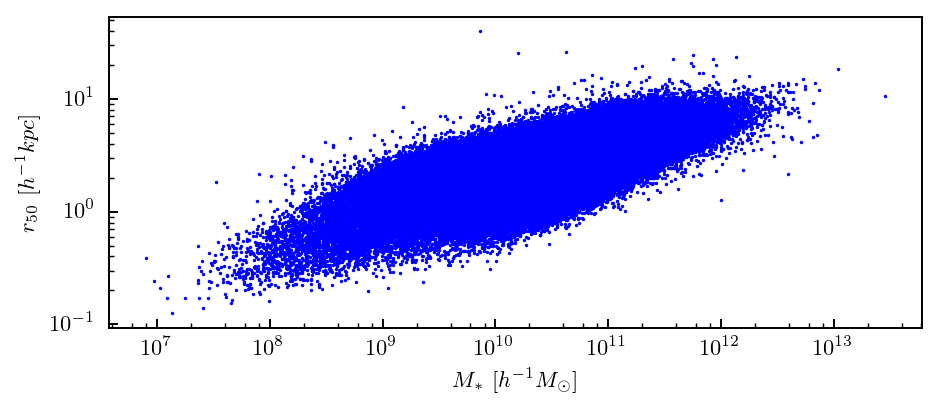

In [4]:
# absolute magnitude in the r-band corrected for extinction, evolution, and k-correction
Mmeert = mmeert - 5.0*np.log10(d_Lm/1e-5) - extm + 1.3*zm - kcorr; 
Mpetrom = mpetrom - 5.0*np.log10(d_Lm/1e-5) - extm + 1.3*zm - kcorr;
# compute log10(L); 4.67 is the r-band luminosity in Lsun
Lmeert =  0.4*(4.67-Mmeert); 


# convert to stellar mass using the M/L conversion from Bell et al. 2003 for the Chabrier IMF
lMsLrbell = -.306 + 1.097*grm - 0.1
# convert to stellar mass. Note that Lmeert and other L quantities below now mean stellar mass
lMstar = Lmeert + lMsLrbell



# plot distribution of galaxies in the slice around the SDSS Great Wall
ax = plt.subplot(111, aspect='equal')
ax.scatter(np.power(10.0,lMstar)/0.7, halfradius, s=2, lw=0, c='b')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel(r'$M_*\,\, [h^{-1} M_\odot]$')
ax.set_ylabel(r'$r_{50}\,\, [h^{-1}kpc]$')

plt.show()



We see that in practice galaxies scatter in $r_{50} - M_*$ plane; there is not an exact "one-to-one" correspondence between stellar mass and half-mass radius. 

Using the data above, we will find the median $r_{50}$ at each $M_*$ and we will plot that as a function of mass to compare with the relation we got previously.



In [5]:
nbins = 100
radbins, Mbins = np.histogram(lMstar, bins=nbins)

#mean values of masses at each bin
meanbins = 0.5 * (Mbins[1:] + Mbins[:-1])


n = np.size(radbins)

mn = np.size(lMstar)

sumrad= np.zeros(n)


#calculation of mean r_50 at each bin

#first calculate the sum of radii of galaxies in every bin 
for i in range(n):
    for j in range(mn):
        if ((lMstar[j] >= Mbins[i])and(lMstar[j] <= Mbins[i+1])):
            sumrad[i] = sumrad[i] + halfradius[j]
            
            


            
            
meanrad = sumrad/radbins






/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:28: RuntimeWarning: invalid value encountered in divide


Let's plot now the $r_{50} - M_*$ relation (at $z \sim 0$) using the observational data, where $r_{50}$ is the mean value of half-light (half-mass) radius at each mass bin.

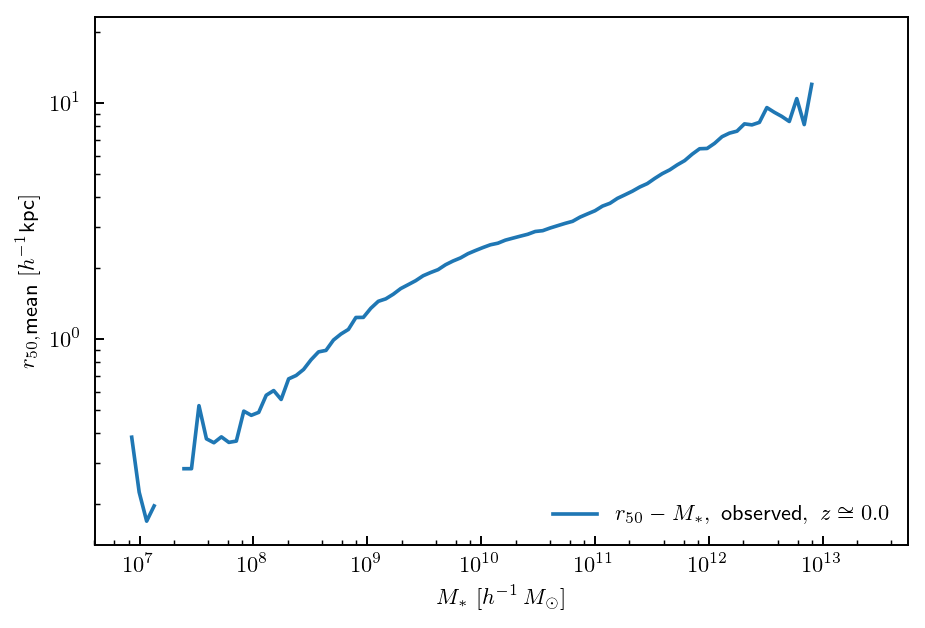

In [6]:
plt.plot(np.power(10.0,meanbins)/0.7, meanrad, label=r'$r_{50} - M_*, \,\,\mbox{observed},\,\, z \cong 0.0$')
plt.xscale('log'); plt.yscale('log')

plt.legend(frameon=False, loc='lower right', fontsize=9)

plt.xlabel('$M_* \,\,[h^{-1}\,M_\odot]$')
plt.ylabel('$r_{50, \mbox{mean}}\,\,[h^{-1}\mbox{kpc}]$')


plt.show()



Now, in order to compare with the theoretical curve we got before, let's overplot the two curves in a range of masses we have observational data (say $[10^{8} - 2\times 10^{12}] \,\, h^{-1} M_\odot$):

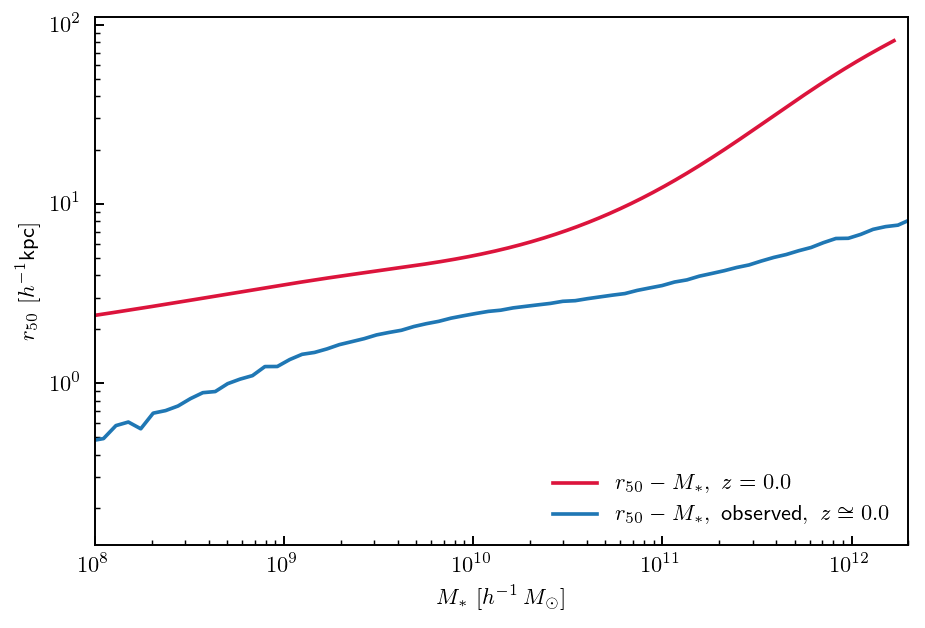

In [7]:
plt.plot(mstell, r50z00, c ='crimson', label=r'$r_{50} - M_*, \,\,z=0.0$')
plt.plot(np.power(10.0,meanbins)/0.7, meanrad, label=r'$r_{50} - M_*, \,\,\mbox{observed},\,\, z \cong 0.0$')
plt.xscale('log'); plt.yscale('log')

plt.legend(frameon=False, loc='lower right', fontsize=9)

plt.xlabel('$M_* \,\,[h^{-1}\,M_\odot]$')
plt.ylabel('$r_{50}\,\,[h^{-1}\mbox{kpc}]$')

plt.xlim(1e8,2e12)

plt.show()

We see that, although both curves follow the same trend, the theoretical curve overestimates (compared to the obseved one) the value of $r_{50}$ by a factor of $~2$ (at lower mass scales) to almost an order of magnitude (at higher mass scales).

### Problem 2 - Simple model of galactic wind

Energy and momentum injection by supernovae feedback is thought to drive powerful winds from galaxies. The mass outflow rate scales as $dM_{\rm g}/dt=\epsilon_{\rm out} dM_*/dt$, where $\epsilon_{\rm out}$ is called the mass loading factor and can be constant or varying with galaxy parameters (see (b) below). Krumholz & Dekel (2012) simply assume that it is constant: $\epsilon_{\rm out}=1$ (see their eq. 1 and Table 1). This is broadly consistent with what we know about winds of observed $L\sim L_*$ galaxies, although there are both observational and theoretical indications that $\epsilon_{\rm out}$ likely depends on galaxy stellar mass.


(a) Implement such constant $\epsilon_{\rm out}$ wind model and re-run galaxy evolution calculation for $M_*-M$ relation for a couple of values of $\epsilon_{\rm out}$. How does inclusion of outflow in this way affect the results? How does the predicted relation compare to the $M_\star-M_{\rm h}$ derived from the abundance matching in HW4? 


(b) Recent simulations of galaxy formation have started to calibrate wind models of the kind discussed in (a) above. In particular, Muratov et al. (2015) report that the loading factor has simple scaling with stellar mass in their simulations: $\epsilon_{\rm out}=3.6M_{*,10}^{-0.35}$ where $M_{*,10}$ is galaxy current stellar mass in units of $10^{10}\ M_\odot$ (see their Fig. 6 and eq. 8). Implement such model and discuss the differences from the model implemented in (a). What is the overall effect of wind outflows on $M_*-M$ relation? How does the predicted relation compare to the $M_\star-M_{\rm h}$ derived from the abundance matching in HW4?  Interpret the shape of this relation using the arguments presented in the notebook ex10_galaxy_formation_model.ipynb . 

### Solution

###### a) 

First constant $\epsilon_{out}$. Define three models, with: $\epsilon_{out} = 1.0, 10.0, 100.0$.

In [8]:
import numpy as np
import code.galaxy_model as gm
from colossus.cosmology import cosmology

# define a vector of cosmological parameters:    
my_cosmo = {'flat': True, 'H0': 70.0, 'Om0': 0.27, 'Ob0': 0.045714, 'sigma8': 0.82, 'ns': 0.96}
# set my_cosmo to be the current cosmology
cosmo = cosmology.setCosmology('my_cosmo', my_cosmo)    

# inherit class for this homework from the base model_galaxy class
# add the required functions to it
class gmodel1_UVheating(gm.model_galaxy):
    def __init__(self, *args, **kwargs):
        super(gmodel1_UVheating, self).__init__(*args, **kwargs)
        return

    def Mhot(self, z):
        mnl = self.cosmo.nonLinearMass(z)
        mhot = 1.e12 * self.cosmo.h * np.maximum(2., 1.e12/(3.*mnl/self.cosmo.h))
        return mhot
       
    def UV_cutoff(self, z):
        """
        approximation to the cutoff mass in Fig 3 of Okamoto, Gao & Theuns 2008
        the output is mass in /h Msun. 
        """
        dummy = np.zeros_like(z)
        dummy[z>9] = 1.e6
        dummy[z<=9] = 6.e9*np.exp(-0.63*z[z<9]) # expression from Nick
        return  1.0/(1.0+(2.**(2./3.)-1.)*(dummy/self.Mh)**2)**(1.5)

    def Mg_in(self, t):
        dummy = self.fbuni*self.fg_in(t)*self.eps_in(t)*self.dMhdt(self.Mh,t)
        return dummy

    def Ms_in(self, t):
        dummy = 0.0
        return dummy

    def fg_in(self,t):
        zd = self.cosmo.age(t, inverse=True)
        # here I implement soft suppression of baryon fraction, as seen in simulation (eq 2.2 in the notes)
        # results are qualitatively the same, but this function makes suppression a "softer" as a function of M
        return self.UV_cutoff(zd)
    
    def eps_in(self, t):
        zd = self.cosmo.age(t, inverse=True)
        epsin = 1.0
        if self.Mh >= self.Mhot(zd):
            epsin = 0.0
        return epsin
    
    def eps_out(self):
        epsout = 1.0
        return epsout
    
    
    
class gmodel2_UVheating(gm.model_galaxy):
    def __init__(self, *args, **kwargs):
        super(gmodel2_UVheating, self).__init__(*args, **kwargs)
        return

    def Mhot(self, z):
        mnl = self.cosmo.nonLinearMass(z)
        mhot = 1.e12 * self.cosmo.h * np.maximum(2., 1.e12/(3.*mnl/self.cosmo.h))
        return mhot
       
    def UV_cutoff(self, z):
        """
        approximation to the cutoff mass in Fig 3 of Okamoto, Gao & Theuns 2008
        the output is mass in /h Msun. 
        """
        dummy = np.zeros_like(z)
        dummy[z>9] = 1.e6
        dummy[z<=9] = 6.e9*np.exp(-0.63*z[z<9]) # expression from Nick
        return  1.0/(1.0+(2.**(2./3.)-1.)*(dummy/self.Mh)**2)**(1.5)

    def Mg_in(self, t):
        dummy = self.fbuni*self.fg_in(t)*self.eps_in(t)*self.dMhdt(self.Mh,t)
        return dummy

    def Ms_in(self, t):
        dummy = 0.0
        return dummy

    def fg_in(self,t):
        zd = self.cosmo.age(t, inverse=True)
        # here I implement soft suppression of baryon fraction, as seen in simulation (eq 2.2 in the notes)
        # results are qualitatively the same, but this function makes suppression a "softer" as a function of M
        return self.UV_cutoff(zd)
    
    def eps_in(self, t):
        zd = self.cosmo.age(t, inverse=True)
        epsin = 1.0
        if self.Mh >= self.Mhot(zd):
            epsin = 0.0
        return epsin
    
    def eps_out(self):
        epsout = 10.0
        return epsout
    
    
class gmodel3_UVheating(gm.model_galaxy):
    def __init__(self, *args, **kwargs):
        super(gmodel3_UVheating, self).__init__(*args, **kwargs)
        return

    def Mhot(self, z):
        mnl = self.cosmo.nonLinearMass(z)
        mhot = 1.e12 * self.cosmo.h * np.maximum(2., 1.e12/(3.*mnl/self.cosmo.h))
        return mhot
       
    def UV_cutoff(self, z):
        """
        approximation to the cutoff mass in Fig 3 of Okamoto, Gao & Theuns 2008
        the output is mass in /h Msun. 
        """
        dummy = np.zeros_like(z)
        dummy[z>9] = 1.e6
        dummy[z<=9] = 6.e9*np.exp(-0.63*z[z<9]) # expression from Nick
        return  1.0/(1.0+(2.**(2./3.)-1.)*(dummy/self.Mh)**2)**(1.5)

    def Mg_in(self, t):
        dummy = self.fbuni*self.fg_in(t)*self.eps_in(t)*self.dMhdt(self.Mh,t)
        return dummy

    def Ms_in(self, t):
        dummy = 0.0
        return dummy

    def fg_in(self,t):
        zd = self.cosmo.age(t, inverse=True)
        # here I implement soft suppression of baryon fraction, as seen in simulation (eq 2.2 in the notes)
        # results are qualitatively the same, but this function makes suppression a "softer" as a function of M
        return self.UV_cutoff(zd)
    
    def eps_in(self, t):
        zd = self.cosmo.age(t, inverse=True)
        epsin = 1.0
        if self.Mh >= self.Mhot(zd):
            epsin = 0.0
        return epsin
    
    def eps_out(self):
        epsout = 100.0
        return epsout    

    

class gmodel4_UVheating(gm.model_galaxy):
    def __init__(self, *args, **kwargs):
        super(gmodel4_UVheating, self).__init__(*args, **kwargs)
        return

    def Mhot(self, z):
        mnl = self.cosmo.nonLinearMass(z)
        mhot = 1.e12 * self.cosmo.h * np.maximum(2., 1.e12/(3.*mnl/self.cosmo.h))
        return mhot
       
    def UV_cutoff(self, z):
        """
        approximation to the cutoff mass in Fig 3 of Okamoto, Gao & Theuns 2008
        the output is mass in /h Msun. 
        """
        dummy = np.zeros_like(z)
        dummy[z>9] = 1.e6
        dummy[z<=9] = 6.e9*np.exp(-0.63*z[z<9]) # expression from Nick
        return  1.0/(1.0+(2.**(2./3.)-1.)*(dummy/self.Mh)**2)**(1.5)

    def Mg_in(self, t):
        dummy = self.fbuni*self.fg_in(t)*self.eps_in(t)*self.dMhdt(self.Mh,t)
        return dummy

    
    
    def fg_in(self,t):
        zd = self.cosmo.age(t, inverse=True)
        # here I implement soft suppression of baryon fraction, as seen in simulation (eq 2.2 in the notes)
        # results are qualitatively the same, but this function makes suppression a "softer" as a function of M
        return self.UV_cutoff(zd)
    
    def eps_in(self, t):
        zd = self.cosmo.age(t, inverse=True)
        epsin = 1.0
        if self.Mh >= self.Mhot(zd):
            epsin = 0.0
        return epsin
    
    def eps_out(self):
        mass = self.Ms
        epsout = 3.6*(mass/1e10)**(-0.35)
        return epsout   

First calculate for $\epsilon =1.0$. 

In [9]:
from scipy.integrate import odeint

def test_galaxy_evolution(Minit, sfrmodel, cosmo, verbose):
    zg = np.linspace(20., 0., 40) # grid of redshifts
    t_output = cosmo.age(zg) # and corresponding times

    # instantiate a galaxy model at t=tinit assuming a given star fromation model and cosmology
    g = gmodel1_UVheating(t = t_output[0], Mh = Minit, Mg = None, Ms = None, MZ = None, 
                     sfrmodel = sfrmodel, cosmo = cosmo, verbose = verbose)
    
    # array of quantities to evolve with ODE solver
    y0 = np.array([g.Mh, g.Mg, g.Ms, g.MZ])
    # evolve y0 in time
    Mout = odeint(g.evolve, y0, t_output, rtol = 1.e-7, mxstep = 4000)
    
    # let's split the output into arrays with intuitive names
    Mhout = np.clip(Mout[:,0], 0.0, 1.e100)
    Mgout = np.clip(Mout[:,1], 0.0, 1.e100)
    Msout = np.clip(Mout[:,2], 0.0, 1.e100)
    MZout = np.clip(Mout[:,3], 0.0, 1.e100)

    return zg, t_output, Mhout, Mgout, Msout, MZout

sfrmodel = "gaslinear"  
# let's take a look at how a halo that has MW-like halo mass at z=0 evolves
# the class method test_galaxy_evolution does some basic run of the model and plots results, so let's setup 
# matplotlib parameters for plotting
from code.plot_utils import plot_pretty
%matplotlib inline
from matplotlib import pylab as plt
plot_pretty()

zg, t_output, Mhout, Mgout, Msout, MZout = test_galaxy_evolution(Minit=2.1e8, 
                                                                 sfrmodel=sfrmodel, cosmo=cosmo, 
                                                                 verbose=False)


In [10]:
# now model with UV heating and hot halo at large masses

from scipy.interpolate import interp2d

# initial metallicity
Z_IGM = 2.e-5

# grid of redshifts and halo masses
Nz = 41; Nm = 100
zg = np.linspace(30., 0., Nz)
lzg1 = np.log10(1.0+zg)
t_output = cosmo.age(zg)
    
lMh = np.linspace(5.0, 8., Nm)
Mh  = np.power(10, lMh)

# arrays to hold evolutionary grids of halo mass, gas mass, stellar mass and metal mass
Mhout = np.zeros((Nm,Nz)); Mgout = np.zeros((Nm,Nz))
Msout = np.zeros((Nm,Nz)); MZout = np.zeros((Nm,Nz))
#evolve a grid of halo masses
for j, Mhd in enumerate(Mh):
    if not j%5:
        print "evolving halo of log10(Mh)=%2.2f ..."%(lMh[j])
    # instantiate a model galaxy with a given halo mass at the initial time
    g = gmodel1_UVheating(t = t_output[0], Mh = Mhd, Mg = None, Ms = None, MZ = None, Z_IGM = Z_IGM, sfrmodel = sfrmodel, cosmo = cosmo)
    # initial values of masses
    y0 = np.array([g.Mh, g.Mg, g.Ms, g.MZ])
    # solve the system of ODEs
    Mout = odeint(g.evolve, y0, t_output, rtol = 1.e-5, mxstep = 4000)
    Mout = Mout/g.cosmo.h
    # split Mout into arrays for specific masses with more intuitive names for convenience
    Mhout[j,:] = Mout[:,0]; Mgout[j,:] = Mout[:,1]
    Msout[j,:] = Mout[:,2]; MZout[j,:] = Mout[:,3]
# 
# prepare 2D splines for interpolation
#
Mmin = 1.e-10 # prevent zeros in case no SF occurred
lMhi = interp2d(lzg1, lMh, np.log10(np.maximum(Mmin,Mhout)), bounds_error=True, kind='cubic')
lMgi = interp2d(lzg1, lMh, np.log10(np.maximum(Mmin,Mgout)), bounds_error=True, kind='cubic')
lMsi = interp2d(lzg1, lMh, np.log10(np.maximum(Mmin,Msout)), bounds_error=True, kind='cubic')
lMZi = interp2d(lzg1, lMh, np.log10(np.maximum(Mmin,MZout)), bounds_error=True, kind='cubic')


evolving halo of log10(Mh)=5.00 ...
evolving halo of log10(Mh)=5.15 ...
evolving halo of log10(Mh)=5.30 ...
evolving halo of log10(Mh)=5.45 ...
evolving halo of log10(Mh)=5.61 ...
evolving halo of log10(Mh)=5.76 ...
evolving halo of log10(Mh)=5.91 ...
evolving halo of log10(Mh)=6.06 ...
evolving halo of log10(Mh)=6.21 ...
evolving halo of log10(Mh)=6.36 ...
evolving halo of log10(Mh)=6.52 ...
evolving halo of log10(Mh)=6.67 ...
evolving halo of log10(Mh)=6.82 ...
evolving halo of log10(Mh)=6.97 ...
evolving halo of log10(Mh)=7.12 ...
evolving halo of log10(Mh)=7.27 ...
evolving halo of log10(Mh)=7.42 ...
evolving halo of log10(Mh)=7.58 ...
evolving halo of log10(Mh)=7.73 ...
evolving halo of log10(Mh)=7.88 ...


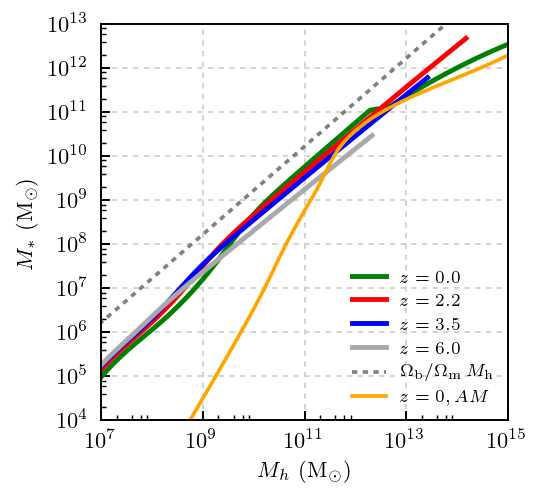

In [11]:
#
# plot
#

fig = plt.figure(figsize=(3, 3))
plot_pretty()
plt.xlabel(r'$M_h\ \rm (M_\odot)$')
plt.ylabel(r'$M_{*}\ \rm (M_\odot)$')
plt.xlim(1.e7,1.e15); plt.ylim(1.e4,1.e13)
plt.xscale('log'); plt.yscale('log')
        
z_plot = np.array([0., 2.2, 3.5, 6.0])
# colors a la Feldmann for easier comparison
zcolors = ['green', 'red', 'blue', 'darkgray']
for i, zplot in enumerate(z_plot):
    Mhz = 10.**lMhi(np.log10(1.0+zplot),lMh)
    Msz = 10.**lMsi(np.log10(1.0+zplot),lMh)
    plt.plot(Mhz, Msz, c=zcolors[i], lw=2.0, label=r'$z=%1.1f$'%zplot)
            
lMhlin = np.linspace(6., 16, 100); Mhlin = 10.**lMhlin
Mslin = Mhlin * cosmo.Ob0/cosmo.Om0
plt.plot(Mhlin, Mslin, ':', c='gray', lw=1.5, label=r'$\Omega_{\rm b}/\Omega_{\rm m}\, M_{\rm h}$')

# load the z=0 M*-Mvir relation derived from AM above
MvirAM, MsAM = np.loadtxt('ms_mvir_z0.dat', usecols=(0,1), unpack=True)
plt.plot(MvirAM, MsAM, c='orange', lw=1.5, label=r'$z=0, AM$')

plt.legend(frameon=False,loc='lower right', fontsize=7)
plt.grid(linestyle='dotted', c='lightgray')
plt.show()

Next for $\epsilon_{out} = 10.0$:

In [12]:
def test_galaxy_evolution(Minit, sfrmodel, cosmo, verbose):
    zg = np.linspace(20., 0., 40) # grid of redshifts
    t_output = cosmo.age(zg) # and corresponding times

    # instantiate a galaxy model at t=tinit assuming a given star fromation model and cosmology
    g = gmodel2_UVheating(t = t_output[0], Mh = Minit, Mg = None, Ms = None, MZ = None, 
                     sfrmodel = sfrmodel, cosmo = cosmo, verbose = verbose)
    
    # array of quantities to evolve with ODE solver
    y0 = np.array([g.Mh, g.Mg, g.Ms, g.MZ])
    # evolve y0 in time
    Mout = odeint(g.evolve, y0, t_output, rtol = 1.e-7, mxstep = 4000)
    
    # let's split the output into arrays with intuitive names
    Mhout = np.clip(Mout[:,0], 0.0, 1.e100)
    Mgout = np.clip(Mout[:,1], 0.0, 1.e100)
    Msout = np.clip(Mout[:,2], 0.0, 1.e100)
    MZout = np.clip(Mout[:,3], 0.0, 1.e100)

    return zg, t_output, Mhout, Mgout, Msout, MZout

sfrmodel = "gaslinear"  
# let's take a look at how a halo that has MW-like halo mass at z=0 evolves
# the class method test_galaxy_evolution does some basic run of the model and plots results, so let's setup 
# matplotlib parameters for plotting
from code.plot_utils import plot_pretty
%matplotlib inline
from matplotlib import pylab as plt
plot_pretty()

zg, t_output, Mhout, Mgout, Msout, MZout = test_galaxy_evolution(Minit=2.1e8, 
                                                                 sfrmodel=sfrmodel, cosmo=cosmo, 
                                                                 verbose=False)



In [13]:
# now model with UV heating and hot halo at large masses

from scipy.interpolate import interp2d

# initial metallicity
Z_IGM = 2.e-5

# grid of redshifts and halo masses
Nz = 41; Nm = 100
zg = np.linspace(30., 0., Nz)
lzg1 = np.log10(1.0+zg)
t_output = cosmo.age(zg)
    
lMh = np.linspace(5.0, 8., Nm)
Mh  = np.power(10, lMh)

# arrays to hold evolutionary grids of halo mass, gas mass, stellar mass and metal mass
Mhout = np.zeros((Nm,Nz)); Mgout = np.zeros((Nm,Nz))
Msout = np.zeros((Nm,Nz)); MZout = np.zeros((Nm,Nz))
#evolve a grid of halo masses
for j, Mhd in enumerate(Mh):
    if not j%5:
        print "evolving halo of log10(Mh)=%2.2f ..."%(lMh[j])
    # instantiate a model galaxy with a given halo mass at the initial time
    g = gmodel2_UVheating(t = t_output[0], Mh = Mhd, Mg = None, Ms = None, MZ = None, Z_IGM = Z_IGM, sfrmodel = sfrmodel, cosmo = cosmo)
    # initial values of masses
    y0 = np.array([g.Mh, g.Mg, g.Ms, g.MZ])
    # solve the system of ODEs
    Mout = odeint(g.evolve, y0, t_output, rtol = 1.e-5, mxstep = 4000)
    Mout = Mout/g.cosmo.h
    # split Mout into arrays for specific masses with more intuitive names for convenience
    Mhout[j,:] = Mout[:,0]; Mgout[j,:] = Mout[:,1]
    Msout[j,:] = Mout[:,2]; MZout[j,:] = Mout[:,3]
# 
# prepare 2D splines for interpolation
#
Mmin = 1.e-10 # prevent zeros in case no SF occurred
lMhi = interp2d(lzg1, lMh, np.log10(np.maximum(Mmin,Mhout)), bounds_error=True, kind='cubic')
lMgi = interp2d(lzg1, lMh, np.log10(np.maximum(Mmin,Mgout)), bounds_error=True, kind='cubic')
lMsi = interp2d(lzg1, lMh, np.log10(np.maximum(Mmin,Msout)), bounds_error=True, kind='cubic')
lMZi = interp2d(lzg1, lMh, np.log10(np.maximum(Mmin,MZout)), bounds_error=True, kind='cubic')



evolving halo of log10(Mh)=5.00 ...
evolving halo of log10(Mh)=5.15 ...
evolving halo of log10(Mh)=5.30 ...
evolving halo of log10(Mh)=5.45 ...
evolving halo of log10(Mh)=5.61 ...
evolving halo of log10(Mh)=5.76 ...
evolving halo of log10(Mh)=5.91 ...
evolving halo of log10(Mh)=6.06 ...
evolving halo of log10(Mh)=6.21 ...
evolving halo of log10(Mh)=6.36 ...
evolving halo of log10(Mh)=6.52 ...
evolving halo of log10(Mh)=6.67 ...
evolving halo of log10(Mh)=6.82 ...
evolving halo of log10(Mh)=6.97 ...
evolving halo of log10(Mh)=7.12 ...
evolving halo of log10(Mh)=7.27 ...
evolving halo of log10(Mh)=7.42 ...
evolving halo of log10(Mh)=7.58 ...
evolving halo of log10(Mh)=7.73 ...
evolving halo of log10(Mh)=7.88 ...


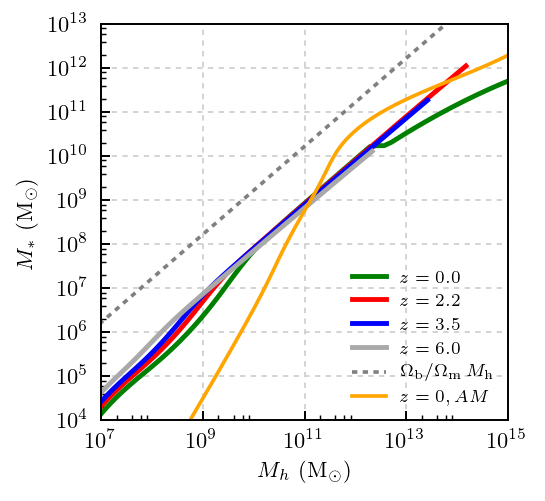

In [14]:
#
# plot
#

fig = plt.figure(figsize=(3, 3))
plot_pretty()
plt.xlabel(r'$M_h\ \rm (M_\odot)$')
plt.ylabel(r'$M_{*}\ \rm (M_\odot)$')
plt.xlim(1.e7,1.e15); plt.ylim(1.e4,1.e13)
plt.xscale('log'); plt.yscale('log')
        
z_plot = np.array([0., 2.2, 3.5, 6.0])
# colors a la Feldmann for easier comparison
zcolors = ['green', 'red', 'blue', 'darkgray']
for i, zplot in enumerate(z_plot):
    Mhz = 10.**lMhi(np.log10(1.0+zplot),lMh)
    Msz = 10.**lMsi(np.log10(1.0+zplot),lMh)
    plt.plot(Mhz, Msz, c=zcolors[i], lw=2.0, label=r'$z=%1.1f$'%zplot)
            
lMhlin = np.linspace(6., 16, 100); Mhlin = 10.**lMhlin
Mslin = Mhlin * cosmo.Ob0/cosmo.Om0
plt.plot(Mhlin, Mslin, ':', c='gray', lw=1.5, label=r'$\Omega_{\rm b}/\Omega_{\rm m}\, M_{\rm h}$')

# load the z=0 M*-Mvir relation derived from AM above
MvirAM, MsAM = np.loadtxt('ms_mvir_z0.dat', usecols=(0,1), unpack=True)
plt.plot(MvirAM, MsAM, c='orange', lw=1.5, label=r'$z=0, AM$')

plt.legend(frameon=False,loc='lower right', fontsize=7)
plt.grid(linestyle='dotted', c='lightgray')
plt.show()

And finally $\epsilon_{out} = 100.0:$

In [15]:
def test_galaxy_evolution(Minit, sfrmodel, cosmo, verbose):
    zg = np.linspace(20., 0., 40) # grid of redshifts
    t_output = cosmo.age(zg) # and corresponding times

    # instantiate a galaxy model at t=tinit assuming a given star fromation model and cosmology
    g = gmodel3_UVheating(t = t_output[0], Mh = Minit, Mg = None, Ms = None, MZ = None, 
                     sfrmodel = sfrmodel, cosmo = cosmo, verbose = verbose)
    
    # array of quantities to evolve with ODE solver
    y0 = np.array([g.Mh, g.Mg, g.Ms, g.MZ])
    # evolve y0 in time
    Mout = odeint(g.evolve, y0, t_output, rtol = 1.e-7, mxstep = 4000)
    
    # let's split the output into arrays with intuitive names
    Mhout = np.clip(Mout[:,0], 0.0, 1.e100)
    Mgout = np.clip(Mout[:,1], 0.0, 1.e100)
    Msout = np.clip(Mout[:,2], 0.0, 1.e100)
    MZout = np.clip(Mout[:,3], 0.0, 1.e100)

    return zg, t_output, Mhout, Mgout, Msout, MZout

sfrmodel = "gaslinear"  
# let's take a look at how a halo that has MW-like halo mass at z=0 evolves
# the class method test_galaxy_evolution does some basic run of the model and plots results, so let's setup 
# matplotlib parameters for plotting
from code.plot_utils import plot_pretty
%matplotlib inline
from matplotlib import pylab as plt
plot_pretty()

zg, t_output, Mhout, Mgout, Msout, MZout = test_galaxy_evolution(Minit=2.1e8, 
                                                                 sfrmodel=sfrmodel, cosmo=cosmo, 
                                                                 verbose=False)

In [16]:
# now model with UV heating and hot halo at large masses

from scipy.interpolate import interp2d

# initial metallicity
Z_IGM = 2.e-5

# grid of redshifts and halo masses
Nz = 41; Nm = 100
zg = np.linspace(30., 0., Nz)
lzg1 = np.log10(1.0+zg)
t_output = cosmo.age(zg)
    
lMh = np.linspace(5.0, 8., Nm)
Mh  = np.power(10, lMh)

# arrays to hold evolutionary grids of halo mass, gas mass, stellar mass and metal mass
Mhout = np.zeros((Nm,Nz)); Mgout = np.zeros((Nm,Nz))
Msout = np.zeros((Nm,Nz)); MZout = np.zeros((Nm,Nz))
#evolve a grid of halo masses
for j, Mhd in enumerate(Mh):
    if not j%5:
        print "evolving halo of log10(Mh)=%2.2f ..."%(lMh[j])
    # instantiate a model galaxy with a given halo mass at the initial time
    g = gmodel3_UVheating(t = t_output[0], Mh = Mhd, Mg = None, Ms = None, MZ = None, Z_IGM = Z_IGM, sfrmodel = sfrmodel, cosmo = cosmo)
    # initial values of masses
    y0 = np.array([g.Mh, g.Mg, g.Ms, g.MZ])
    # solve the system of ODEs
    Mout = odeint(g.evolve, y0, t_output, rtol = 1.e-5, mxstep = 4000)
    Mout = Mout/g.cosmo.h
    # split Mout into arrays for specific masses with more intuitive names for convenience
    Mhout[j,:] = Mout[:,0]; Mgout[j,:] = Mout[:,1]
    Msout[j,:] = Mout[:,2]; MZout[j,:] = Mout[:,3]
# 
# prepare 2D splines for interpolation
#
Mmin = 1.e-10 # prevent zeros in case no SF occurred
lMhi = interp2d(lzg1, lMh, np.log10(np.maximum(Mmin,Mhout)), bounds_error=True, kind='cubic')
lMgi = interp2d(lzg1, lMh, np.log10(np.maximum(Mmin,Mgout)), bounds_error=True, kind='cubic')
lMsi = interp2d(lzg1, lMh, np.log10(np.maximum(Mmin,Msout)), bounds_error=True, kind='cubic')
lMZi = interp2d(lzg1, lMh, np.log10(np.maximum(Mmin,MZout)), bounds_error=True, kind='cubic')

evolving halo of log10(Mh)=5.00 ...
evolving halo of log10(Mh)=5.15 ...
evolving halo of log10(Mh)=5.30 ...
evolving halo of log10(Mh)=5.45 ...
evolving halo of log10(Mh)=5.61 ...
evolving halo of log10(Mh)=5.76 ...
evolving halo of log10(Mh)=5.91 ...
evolving halo of log10(Mh)=6.06 ...
evolving halo of log10(Mh)=6.21 ...
evolving halo of log10(Mh)=6.36 ...
evolving halo of log10(Mh)=6.52 ...
evolving halo of log10(Mh)=6.67 ...
evolving halo of log10(Mh)=6.82 ...
evolving halo of log10(Mh)=6.97 ...
evolving halo of log10(Mh)=7.12 ...
evolving halo of log10(Mh)=7.27 ...
evolving halo of log10(Mh)=7.42 ...
evolving halo of log10(Mh)=7.58 ...
evolving halo of log10(Mh)=7.73 ...
evolving halo of log10(Mh)=7.88 ...


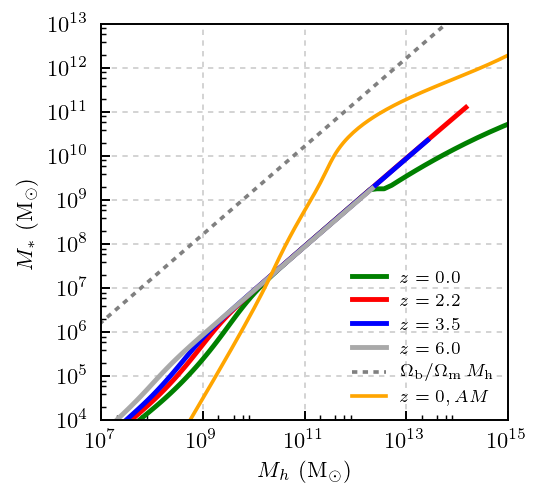

In [17]:
#
# plot
#

fig = plt.figure(figsize=(3, 3))
plot_pretty()
plt.xlabel(r'$M_h\ \rm (M_\odot)$')
plt.ylabel(r'$M_{*}\ \rm (M_\odot)$')
plt.xlim(1.e7,1.e15); plt.ylim(1.e4,1.e13)
plt.xscale('log'); plt.yscale('log')
        
z_plot = np.array([0., 2.2, 3.5, 6.0])
# colors a la Feldmann for easier comparison
zcolors = ['green', 'red', 'blue', 'darkgray']
for i, zplot in enumerate(z_plot):
    Mhz = 10.**lMhi(np.log10(1.0+zplot),lMh)
    Msz = 10.**lMsi(np.log10(1.0+zplot),lMh)
    plt.plot(Mhz, Msz, c=zcolors[i], lw=2.0, label=r'$z=%1.1f$'%zplot)
            
lMhlin = np.linspace(6., 16, 100); Mhlin = 10.**lMhlin
Mslin = Mhlin * cosmo.Ob0/cosmo.Om0
plt.plot(Mhlin, Mslin, ':', c='gray', lw=1.5, label=r'$\Omega_{\rm b}/\Omega_{\rm m}\, M_{\rm h}$')

# load the z=0 M*-Mvir relation derived from AM above
MvirAM, MsAM = np.loadtxt('ms_mvir_z0.dat', usecols=(0,1), unpack=True)
plt.plot(MvirAM, MsAM, c='orange', lw=1.5, label=r'$z=0, AM$')

plt.legend(frameon=False,loc='lower right', fontsize=7)
plt.grid(linestyle='dotted', c='lightgray')
plt.show()

We see that the inclusion of a constant $\epsilon_{out}$ suppresses the  $M_* - M_h$ relation.  This means that for a higher value of $\epsilon_{out}$ we get a lower value for the stellar mass ($M_*$) at a given halo mass scale (M_h).

A value of $\epsilon_{out} = 1$ gives a good fit to the $M_* - M_h$ relation obtained from abundance matching for high mass scales.

High values of $\epsilon_{out}$ suppress too much the $M_* - M_h$ relation.



##### b)



In [18]:
from scipy.integrate import odeint

def test_galaxy_evolution(Minit, sfrmodel, cosmo, verbose):
    zg = np.linspace(20., 0., 40) # grid of redshifts
    t_output = cosmo.age(zg) # and corresponding times

    # instantiate a galaxy model at t=tinit assuming a given star fromation model and cosmology
    g = gmodel4_UVheating(t = t_output[0], Mh = Minit, Mg = None, Ms = Minit, MZ = None, 
                     sfrmodel = sfrmodel, cosmo = cosmo, verbose = verbose)
    
    # array of quantities to evolve with ODE solver
    y0 = np.array([g.Mh, g.Mg, g.Ms, g.MZ])
    # evolve y0 in time
    Mout = odeint(g.evolve, y0, t_output, rtol = 1.e-7, mxstep = 4000)
    
    # let's split the output into arrays with intuitive names
    Mhout = np.clip(Mout[:,0], 0.0, 1.e100)
    Mgout = np.clip(Mout[:,1], 0.0, 1.e100)
    Msout = np.clip(Mout[:,2], 0.0, 1.e100)
    MZout = np.clip(Mout[:,3], 0.0, 1.e100)

    return zg, t_output, Mhout, Mgout, Msout, MZout

sfrmodel = "gaslinear"  
# let's take a look at how a halo that has MW-like halo mass at z=0 evolves
# the class method test_galaxy_evolution does some basic run of the model and plots results, so let's setup 
# matplotlib parameters for plotting
from code.plot_utils import plot_pretty
%matplotlib inline
from matplotlib import pylab as plt
plot_pretty()

zg, t_output, Mhout, Mgout, Msout, MZout = test_galaxy_evolution(Minit=2.1e8, 
                                                                 sfrmodel=sfrmodel, cosmo=cosmo, 
                                                                 verbose=False)

In [19]:
# now model with UV heating and hot halo at large masses

from scipy.interpolate import interp2d

# initial metallicity
Z_IGM = 2.e-5

# grid of redshifts and halo masses
Nz = 41; Nm = 100
zg = np.linspace(30., 0., Nz)
lzg1 = np.log10(1.0+zg)
t_output = cosmo.age(zg)
    
lMh = np.linspace(5.0, 8., Nm)
Mh  = np.power(10, lMh)

# arrays to hold evolutionary grids of halo mass, gas mass, stellar mass and metal mass
Mhout = np.zeros((Nm,Nz)); Mgout = np.zeros((Nm,Nz))
Msout = np.zeros((Nm,Nz)); MZout = np.zeros((Nm,Nz))
#evolve a grid of halo masses
for j, Mhd in enumerate(Mh):
    if not j%5:
        print "evolving halo of log10(Mh)=%2.2f ..."%(lMh[j])
    # instantiate a model galaxy with a given halo mass at the initial time
    g = gmodel4_UVheating(t = t_output[0], Mh = Mhd, Mg = None, Ms = Mhd, MZ = None, Z_IGM = Z_IGM, sfrmodel = sfrmodel, cosmo = cosmo)
    # initial values of masses
    y0 = np.array([g.Mh, g.Mg, g.Ms, g.MZ])
    # solve the system of ODEs
    Mout = odeint(g.evolve, y0, t_output, rtol = 1.e-5, mxstep = 4000)
    Mout = Mout/g.cosmo.h
    # split Mout into arrays for specific masses with more intuitive names for convenience
    Mhout[j,:] = Mout[:,0]; Mgout[j,:] = Mout[:,1]
    Msout[j,:] = Mout[:,2]; MZout[j,:] = Mout[:,3]
# 
# prepare 2D splines for interpolation
#
Mmin = 1.e-10 # prevent zeros in case no SF occurred
lMhi = interp2d(lzg1, lMh, np.log10(np.maximum(Mmin,Mhout)), bounds_error=True, kind='cubic')
lMgi = interp2d(lzg1, lMh, np.log10(np.maximum(Mmin,Mgout)), bounds_error=True, kind='cubic')
lMsi = interp2d(lzg1, lMh, np.log10(np.maximum(Mmin,Msout)), bounds_error=True, kind='cubic')
lMZi = interp2d(lzg1, lMh, np.log10(np.maximum(Mmin,MZout)), bounds_error=True, kind='cubic')




evolving halo of log10(Mh)=5.00 ...
evolving halo of log10(Mh)=5.15 ...
evolving halo of log10(Mh)=5.30 ...
evolving halo of log10(Mh)=5.45 ...
evolving halo of log10(Mh)=5.61 ...
evolving halo of log10(Mh)=5.76 ...
evolving halo of log10(Mh)=5.91 ...
evolving halo of log10(Mh)=6.06 ...
evolving halo of log10(Mh)=6.21 ...
evolving halo of log10(Mh)=6.36 ...
evolving halo of log10(Mh)=6.52 ...
evolving halo of log10(Mh)=6.67 ...
evolving halo of log10(Mh)=6.82 ...
evolving halo of log10(Mh)=6.97 ...
evolving halo of log10(Mh)=7.12 ...
evolving halo of log10(Mh)=7.27 ...
evolving halo of log10(Mh)=7.42 ...
evolving halo of log10(Mh)=7.58 ...
evolving halo of log10(Mh)=7.73 ...
evolving halo of log10(Mh)=7.88 ...


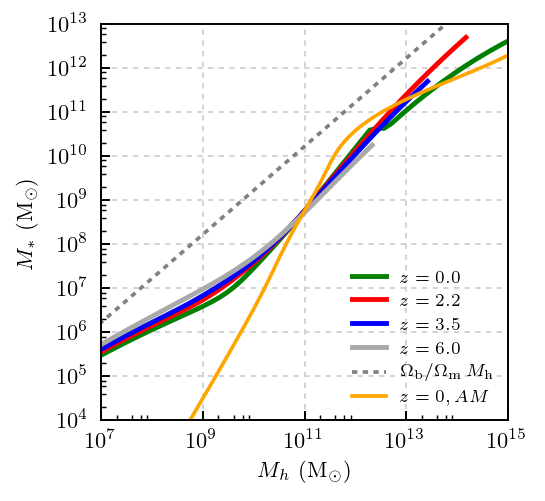

In [20]:
#
# plot
#

fig = plt.figure(figsize=(3, 3))
plot_pretty()
plt.xlabel(r'$M_h\ \rm (M_\odot)$')
plt.ylabel(r'$M_{*}\ \rm (M_\odot)$')
plt.xlim(1.e7,1.e15); plt.ylim(1.e4,1.e13)
plt.xscale('log'); plt.yscale('log')
        
z_plot = np.array([0., 2.2, 3.5, 6.0])
# colors a la Feldmann for easier comparison
zcolors = ['green', 'red', 'blue', 'darkgray']
for i, zplot in enumerate(z_plot):
    Mhz = 10.**lMhi(np.log10(1.0+zplot),lMh)
    Msz = 10.**lMsi(np.log10(1.0+zplot),lMh)
    plt.plot(Mhz, Msz, c=zcolors[i], lw=2.0, label=r'$z=%1.1f$'%zplot)
            
lMhlin = np.linspace(6., 16, 100); Mhlin = 10.**lMhlin
Mslin = Mhlin * cosmo.Ob0/cosmo.Om0
plt.plot(Mhlin, Mslin, ':', c='gray', lw=1.5, label=r'$\Omega_{\rm b}/\Omega_{\rm m}\, M_{\rm h}$')

# load the z=0 M*-Mvir relation derived from AM above
MvirAM, MsAM = np.loadtxt('ms_mvir_z0.dat', usecols=(0,1), unpack=True)
plt.plot(MvirAM, MsAM, c='orange', lw=1.5, label=r'$z=0, AM$')

plt.legend(frameon=False,loc='lower right', fontsize=7)
plt.grid(linestyle='dotted', c='lightgray')
plt.show()

Now, the $M_* - M_h$ relation is scale dependent; we don't have an overall suppression as before but we have mass dependence. 

There is a good agreement between the $M_* - M_h$ as obtained from abundance matching and using the mass-dependent model for $\epsilon_{out}$ for intermediate and higher masses; the egreement isn't so good for lower mass scales. 